In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
data_train_path = 'Dataset/train'
data_test_path = 'Dataset/test'
data_val_path = 'Dataset/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 4048 files belonging to 5 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['affenpinscher', 'basenji', 'basset', 'beagle', 'bedlington_terrier']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 1078 files belonging to 5 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 4048 files belonging to 5 classes.


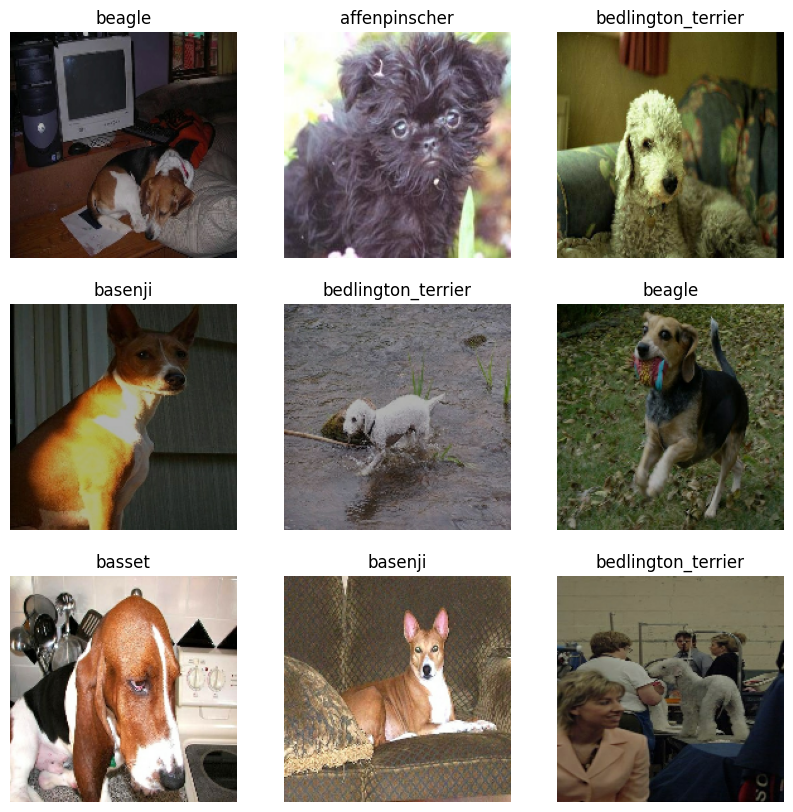

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(data_cat), activation='softmax')
])

In [13]:

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 32
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/32



C:\Users\Nimesh\AppData\Roaming\Python\Python310\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



127/127 [==============================] - 75s 577ms/step - loss: 3.9288 - accuracy: 0.4597 - val_loss: 10.9181 - val_accuracy: 0.2662
Epoch 2/32
127/127 [==============================] - 71s 558ms/step - loss: 1.1460 - accuracy: 0.5870 - val_loss: 1.6402 - val_accuracy: 0.5538
Epoch 3/32
127/127 [==============================] - 77s 602ms/step - loss: 0.7663 - accuracy: 0.6900 - val_loss: 1.1438 - val_accuracy: 0.6521
Epoch 4/32
127/127 [==============================] - 77s 603ms/step - loss: 0.6216 - accuracy: 0.7582 - val_loss: 0.3441 - val_accuracy: 0.8711
Epoch 5/32
127/127 [==============================] - 69s 540ms/step - loss: 0.5299 - accuracy: 0.7957 - val_loss: 0.2203 - val_accuracy: 0.9109
Epoch 6/32
127/127 [==============================] - 75s 592ms/step - loss: 0.4518 - accuracy: 0.8236 - val_loss: 0.1921 - val_accuracy: 0.9258
Epoch 7/32
127/127 [==============================] - 76s 597ms/step - loss: 0.3907 - accuracy: 0.8463 - val_loss: 0.1125 - val_accuracy: 0

Text(0.5, 1.0, 'Loss')

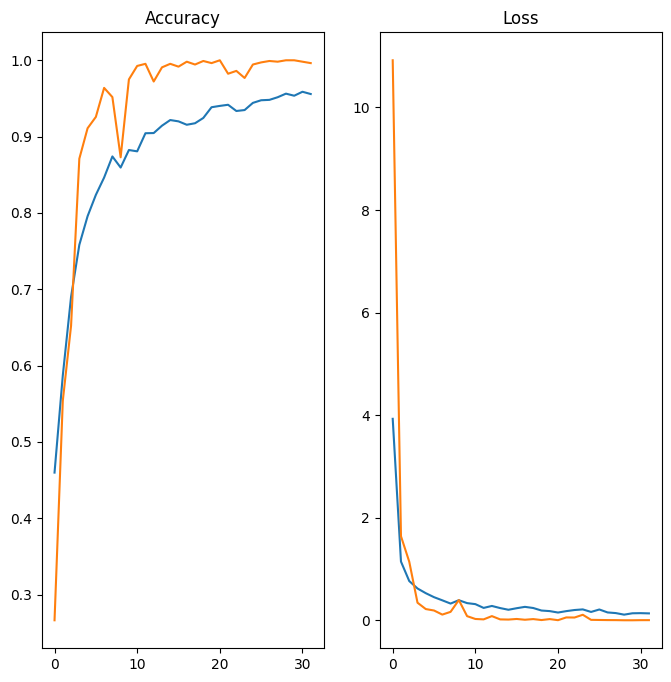

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [16]:
test_loss, test_accuracy = model.evaluate(data_test)
print(f'Test accuracy: {test_accuracy}')


127/127 [==============================] - 18s 143ms/step - loss: 0.0028 - accuracy: 0.9980
Test accuracy: 0.9980236887931824


127/127 [==============================] - 16s 128ms/step


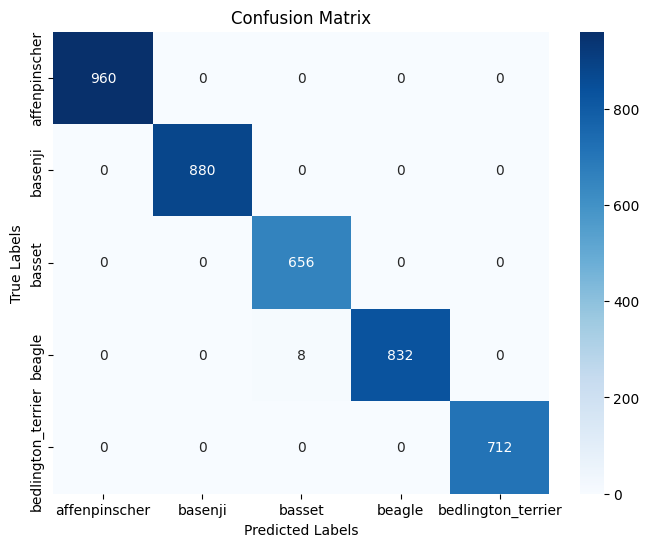

In [17]:

# Make predictions on the test data
predictions = model.predict(data_test)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.concatenate([y for x, y in data_test], axis=0)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data_cat, yticklabels=data_cat)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
